In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import  LogisticRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn import metrics 


In [ ]:
# 1.We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”,
# identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% 
# of the data kept aside for testing.
# [Hint: Refer to LabelEncoder documentation in scikit-learn]

In [2]:
df_voice=pd.read_csv("voice.csv")

In [3]:
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df_voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
df_voice['label']=df_voice["label"].map({"male":"0","female":"1"})

In [7]:
X=df_voice.iloc[:,0:19]
Y=df_voice["label"]

In [8]:
# 2.Fit a logistic regression model and measure the accuracy on the test set.
# [Hint:Refer to Linear Models section in scikit-learn]

In [9]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,random_state=10,test_size=0.20)


In [10]:
ln_model=LogisticRegression()
ln_model.fit(train_x,train_y)


C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
predicted_data=ln_model.predict(test_x)



In [13]:
metrics.accuracy_score(predicted_data,test_y)


0.9258675078864353

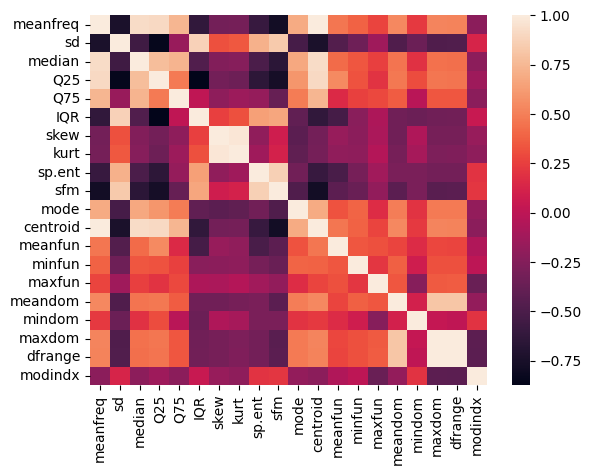

In [15]:
# 3.Compute the correlation matrix that describes the dependence between all predictors and identify the 
# predictors that are highly correlated.  Plot the correlation matrix using seaborn heatmap.
# [Hint: Explore dataframe methods to identify appropriate method]
corr = df_voice.corr()

sns.heatmap(corr)
plt.show()

In [ ]:

# 4.Based on correlation remove those predictors that are correlated and fit a logistic regression model 
# again and compare the accuracy with that of previous model.
# [Hint:Identify correlated variable pairs and remove one among them]


In [ ]:
# strong correlated columns So that we can keep
# "meanfreq" -> "median", "Q25", "centroid"
# "Q25" -> "centroid"
# "maxdom" -> "dfrange"

In [16]:
X= X.drop("median",axis=1)
X=X.drop("Q25",axis=1)
X=X.drop("centroid",axis=1)
X=X.drop("dfrange",axis=1)

In [19]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,random_state=10,test_size=0.20)


In [21]:
ln_model=LogisticRegression()
ln_model.fit(train_x,train_y)
predicted_data=ln_model.predict(test_x)
metrics.accuracy_score(predicted_data,test_y)




C:\Users\VICTUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.917981072555205